<a href="https://colab.research.google.com/github/Averkios1/entropy_time_series_analysis2/blob/main/read_csv_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
!pip install openpyxl pandas numpy matplotlib
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [179]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Path to the CSV file
file_path = '/content/drive/MyDrive/amari_ue_data_merged_with_attack_number.csv'

data = pd.read_csv(file_path)



# Step 1: Handle missing values using SimpleImputer
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Step 2: Convert categorical variables to numeric using label encoding
columns_to_encode = ['bearer_0_apn', 'bearer_0_ip', 'bearer_1_apn', 'bearer_1_ip', 'ran_plmn']
data[columns_to_encode] = data[columns_to_encode].apply(LabelEncoder().fit_transform)

In [180]:
##x = data['ul_tx']
#y = x[1:5000]

In [181]:
#filtered_data = data[data['imeisv'] == '8642840401624200']

selected_features = ['imeisv', 'ul_tx']
filtered_data1 = data[selected_features]


print(filtered_data1)

filtered_data2 = filtered_data1[filtered_data1['imeisv'] == 8642840401624200]

print(filtered_data2)


dataframe = pd.DataFrame(filtered_data1)
print("Original DataFrame:")
print(dataframe)

filtered_dataframe = dataframe[filtered_data1['imeisv'] == 8642840401624200]


print(filtered_dataframe)






dataframe_pivot = dataframe.pivot( columns='imeisv', values='ul_tx' ) #& (dataframe['ul_tx'] > 1)
print("\nDataFrame after pivoting:")
print(dataframe_pivot)


sorted_dataframe = dataframe.sort_values(by='imeisv')
print("DataFrame sorted by Age:")
print(sorted_dataframe)

#sorted_dataframe_pivot = sorted_dataframe.pivot( columns='imeisv', values='ul_tx' ) #& (dataframe['ul_tx'] > 1)
#print("\n sorted DataFrame after pivoting:")
#print(dataframe_pivot)

grouped_dataframe = dataframe.groupby('imeisv')

dataframe2 = pd.DataFrame()

for imeisv, group in grouped_dataframe:
    print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    print(group)
    print(group['ul_tx'][13000:14500])
    #df['col'] = value
    #dataframe2['imeisv'] = group['ul_tx']
    #dataframe2 = pd.concat([dataframe2, group['ul_tx']], axis=1)

#print(dataframe2)




group_8642840401624200 = grouped_dataframe.get_group(8642840401624200)
print("Group 8642840401624200:")
print(group_8642840401624200)
print(group_8642840401624200['ul_tx'][13000:14500])



##print(filtered_dataframe_pivot)

#dataframe_pivot_no_nan = dataframe_pivot.dropna()

#print("\nDataFrame after dropping NaN values:")
#print(dataframe_pivot_no_nan)

              imeisv   ul_tx
0       3.557821e+15    10.0
1       8.642840e+15    10.0
2       8.642840e+15    10.0
3       8.609960e+15  1719.0
4       8.609960e+15  2037.0
...              ...     ...
686021  8.609960e+15    22.0
686022  8.628490e+15   269.0
686023  8.642840e+15   275.0
686024  8.609960e+15   284.0
686025  8.677660e+15   265.0

[686026 rows x 2 columns]
              imeisv  ul_tx
1       8.642840e+15   10.0
10      8.642840e+15   10.0
22      8.642840e+15   12.0
32      8.642840e+15   10.0
36      8.642840e+15   10.0
...              ...    ...
685981  8.642840e+15   18.0
685991  8.642840e+15   19.0
686000  8.642840e+15   18.0
686011  8.642840e+15   18.0
686019  8.642840e+15   20.0

[75304 rows x 2 columns]
Original DataFrame:
              imeisv   ul_tx
0       3.557821e+15    10.0
1       8.642840e+15    10.0
2       8.642840e+15    10.0
3       8.609960e+15  1719.0
4       8.609960e+15  2037.0
...              ...     ...
686021  8.609960e+15    22.0
686022  8.6

In [182]:
dataframe['RowNumber'] = dataframe.groupby('imeisv').cumcount()  # Create a row index for stacking
wide_dataframe = dataframe.pivot(index='RowNumber', columns='imeisv', values='ul_tx').fillna(0)
print(wide_dataframe[13000:14500]) # wide_dataframe[13000:14500]

imeisv     3.557821e+15  8.609960e+15  8.609960e+15  8.609960e+15  \
RowNumber                                                           
13000              12.0        1996.0        1368.0        1654.0   
13001              10.0        2003.0        1329.0        1681.0   
13002              10.0        2004.0        1374.0        1681.0   
13003              10.0        1998.0        1349.0        1647.0   
13004              10.0        1999.0        1349.0        1717.0   
...                 ...           ...           ...           ...   
14495              10.0        1984.0        1431.0        1637.0   
14496              10.0        1962.0        1379.0        1637.0   
14497              10.0        1980.0        1487.0        1712.0   
14498              12.0        1952.0        1321.0        1631.0   
14499              10.0        1972.0        1542.0        1720.0   

imeisv     8.628490e+15  8.642840e+15  8.642840e+15  8.642840e+15  \
RowNumber                        

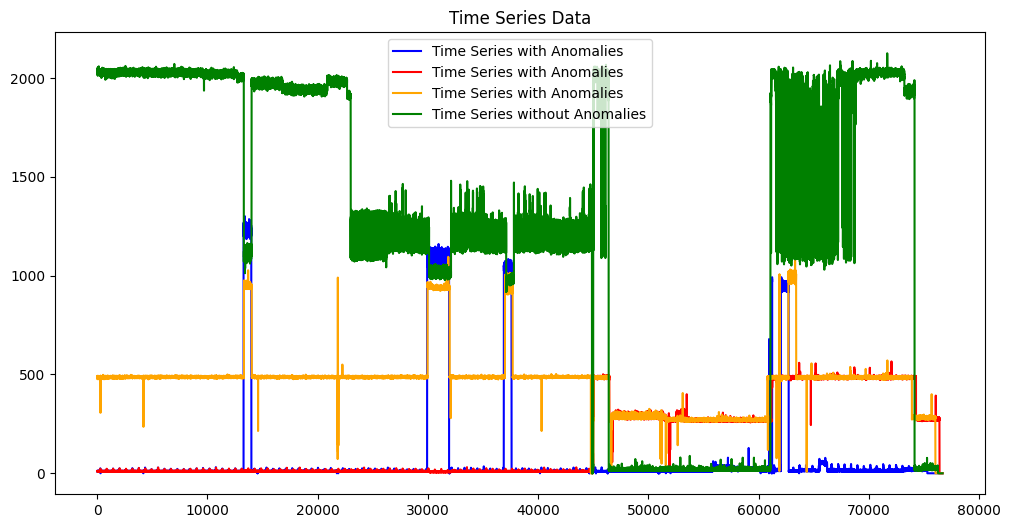

In [183]:
plt.figure(figsize=(12, 6))
plt.plot(wide_dataframe[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8609960468879057], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

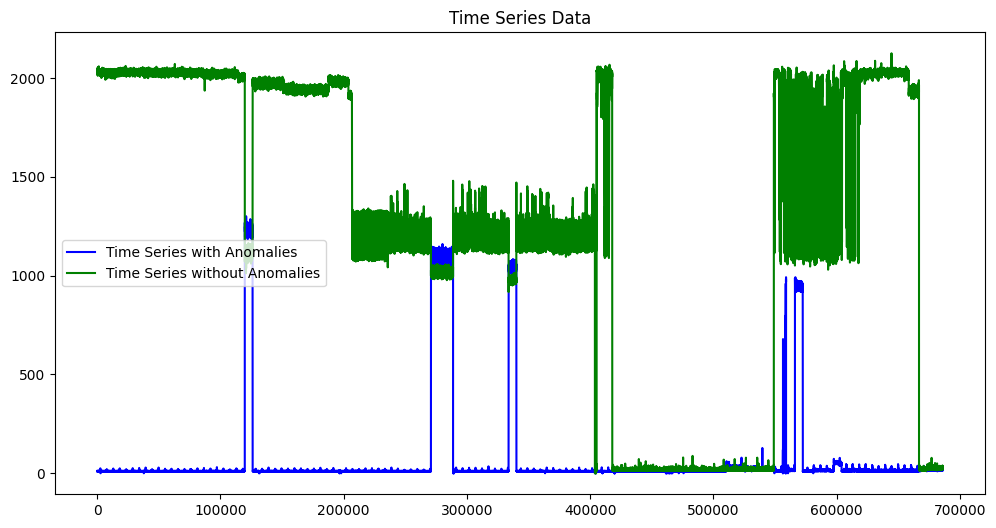

In [184]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(grouped_dataframe.get_group(8642840401624200)['ul_tx'], color="blue", label="Time Series with Anomalies")
plt.plot(grouped_dataframe.get_group(8609960468879057)['ul_tx'], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

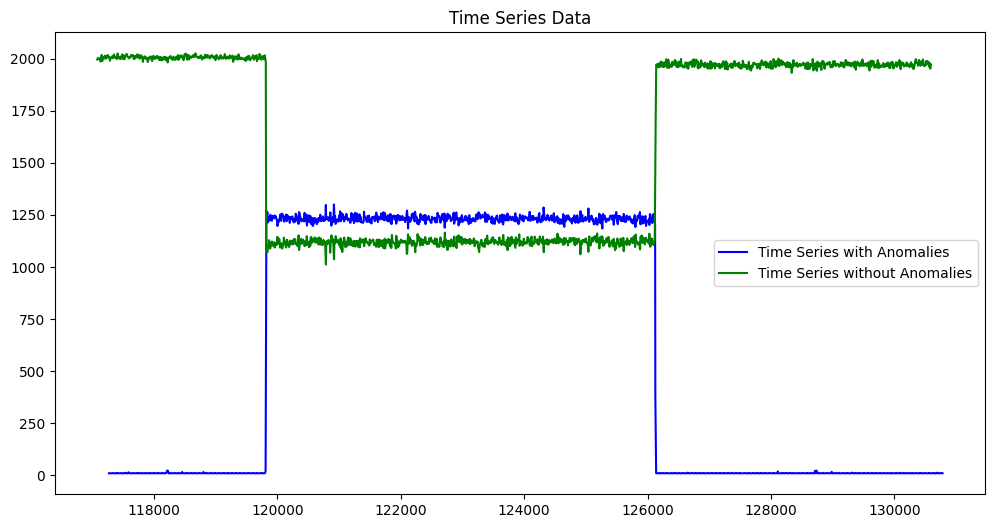

In [185]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(grouped_dataframe.get_group(8642840401624200)['ul_tx'][13000:14500], color="blue", label="Time Series with Anomalies")   # [13000:14500]    [29000:33000]  [36300:38300]
plt.plot(grouped_dataframe.get_group(8609960468879057)['ul_tx'][13000:14500], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

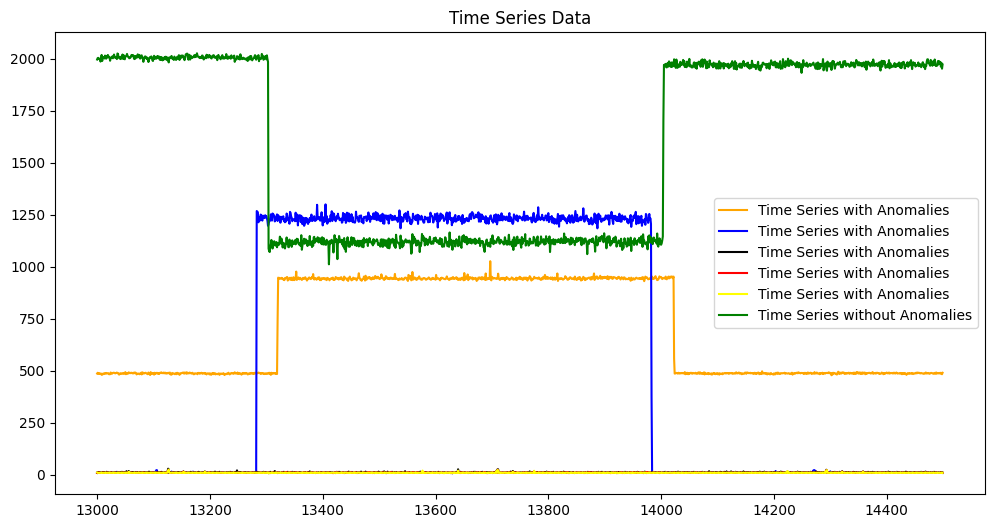

In [186]:


plt.figure(figsize=(12, 6))
plt.plot(wide_dataframe[8642840401612300][13000:14500], color="orange", label="Time Series with Anomalies")  # [13000:14500]    [29000:33000]   [61000:64000]
plt.plot(wide_dataframe[8642840401624200][13000:14500], color="blue", label="Time Series with Anomalies")    #  # [13000:14500]    [29000:33000]  [36300:38300]
plt.plot(wide_dataframe[8642840401594200][13000:14500], color="black", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8677660403123800][13000:14500], color="red", label="Time Series with Anomalies")
plt.plot(wide_dataframe[3557821101183501][13000:14500], color="yellow", label="Time Series with Anomalies")
plt.plot(wide_dataframe[8609960468879057][13000:14500], color="green", label="Time Series without Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

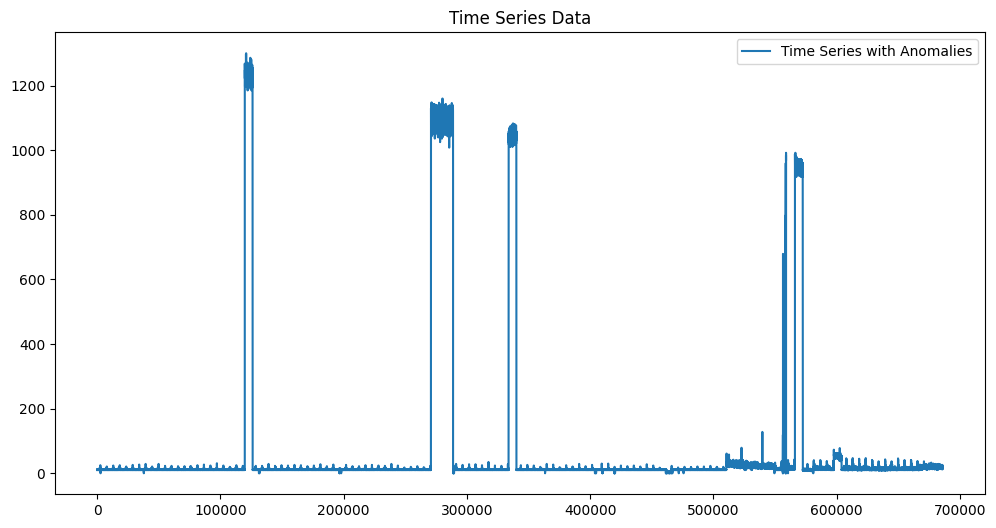

In [187]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(filtered_data2['ul_tx'], label="Time Series with Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

In [188]:
#y2 = filtered_data2['ul_tx']
#y = y2[13000:14500]

y = grouped_dataframe.get_group(8609960468879057)['ul_tx'][13000:14500]

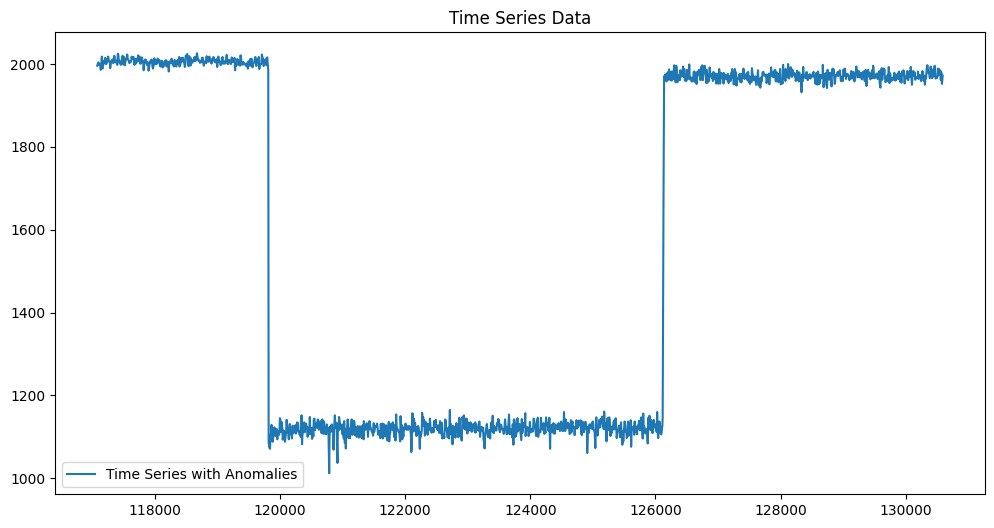

In [189]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(y, label="Time Series with Anomalies")
plt.legend()
plt.title("Time Series Data")
plt.show()

In [190]:
def permutation_entropy(y, order=3, delay=1):
    """
    Compute the permutation entropy of a time series.

    Parameters:
    - time_series: numpy array, the time series data
    - order: int, embedding dimension (D)
    - delay: int, embedding delay (tau)

    Returns:
    - pe: Permutation entropy value
    """
    n = len(y)
    if n < order * delay:
        raise ValueError("Time series is too short for given order and delay.")

    # Generate ordinal patterns
    ordinal_patterns = list(permutations(range(order)))
    pattern_counts = {pattern: 0 for pattern in ordinal_patterns}

    # Count occurrences of each pattern
    for i in range(n - (order - 1) * delay):
        window = y[i:(i + order * delay):delay]
        sorted_indices = tuple(np.argsort(window))
        pattern_counts[sorted_indices] += 1

    # Compute probabilities
    total_patterns = sum(pattern_counts.values())
    probabilities = [count / total_patterns for count in pattern_counts.values()]

    # Calculate permutation entropy
    pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
    return pe


In [191]:
def sliding_window_pe(y, window_size, order=3, delay=1):
    """
    Compute PE over a sliding window.

    Parameters:
    - time_series: numpy array, the time series data
    - window_size: int, size of the sliding window
    - order: int, embedding dimension
    - delay: int, embedding delay

    Returns:
    - pe_values: List of PE values for each window
    """
    pe_values = []
    for i in range(len(y) - window_size + 1):
        window = y[i:i + window_size]
        pe = permutation_entropy(window, order, delay)
        pe_values.append(pe)
    return np.array(pe_values)

# Compute PE
window_size = 50
order = 3
delay = 1

pe_values = sliding_window_pe(y, window_size, order, delay)
print(f"Computed PE values: {pe_values[:5]}")

# Compute PE
pe_series = sliding_window_pe(y, window_size, order, delay)

<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromit

Computed PE values: [1.75668705 1.76460404 1.76460404 1.76251722 1.76251722]


<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromit

In [192]:
print(pe_series)

[1.75668705 1.76460404 1.76460404 ... 1.73061006 1.73952403 1.73061006]


In [193]:
len(pe_series)

1451

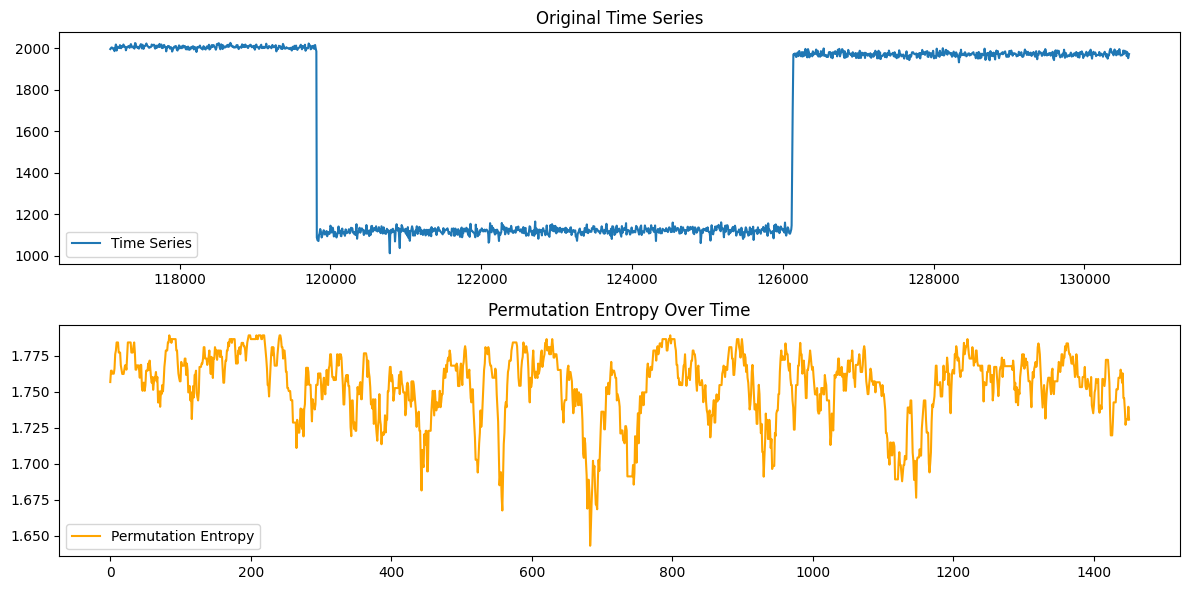

In [194]:
plt.figure(figsize=(12, 6))

# Plot the time series
plt.subplot(2, 1, 1)
plt.plot(y, label="Time Series")
plt.title("Original Time Series")
plt.legend()

# Plot the PE values
plt.subplot(2, 1, 2)
plt.plot(range(len(pe_series)), pe_series, label="Permutation Entropy", color="orange")
plt.title("Permutation Entropy Over Time")
plt.legend()

plt.tight_layout()
plt.show()

In [195]:
index = range(13049,14500)

df_ΕΝΤ_grouped_data = pd.DataFrame(index=index)

#for imeisv, group in grouped_dataframe:
    #print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    #print(group)
    #print(group['ul_tx'][13000:14500])
df_ΕΝΤ_grouped_data = sliding_window_pe(grouped_dataframe.get_group(8609960468879057)['ul_tx'][13000:14500].values, window_size, order, delay)

print(df_ΕΝΤ_grouped_data)

<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)


[1.75668705 1.76460404 1.76460404 ... 1.73061006 1.73952403 1.73061006]


In [196]:
index = range(13049,14500)

df_ΕΝΤ_grouped_data = pd.DataFrame(index=index)

for imeisv, group in grouped_dataframe:
    #print(f"GROUPED  DataFrame for imeisv: {imeisv}")
    #print(group)
    #print(group['ul_tx'][13000:14500])
    df_ΕΝΤ_grouped_data[imeisv] = sliding_window_pe(grouped_dataframe.get_group(imeisv)['ul_tx'][13000:14500].values, window_size, order, delay)

print(df_ΕΝΤ_grouped_data)

<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromit

       3557821101183501  8609960468879057  8609960480666910  8609960480859058  \
13049          0.771011          1.756687          1.646203          1.696293   
13050          0.735622          1.764604          1.646203          1.675429   
13051          0.735622          1.764604          1.646203          1.696293   
13052          0.771011          1.762517          1.646203          1.698380   
13053          0.805805          1.762517          1.600032          1.696293   
...                 ...               ...               ...               ...   
14495          0.837000          1.730610          1.644069          1.686037   
14496          0.805805          1.730610          1.644069          1.668350   
14497          0.805805          1.730610          1.644069          1.683950   
14498          0.805805          1.739524          1.644069          1.679967   
14499          0.837000          1.730610          1.644069          1.683950   

       8628490433231158  86

In [197]:
df_ΕΝΤ = pd.DataFrame(index=wide_dataframe.index[13049:14500])  # Create an empty DataFrame with the desired index
df_ΕΝΤ['ΕΝΤ_8609960468879057'] = sliding_window_pe(wide_dataframe[8609960468879057][13000:14500].values, window_size, order, delay) # Apply to the entire column, not element-wise

print(df_ΕΝΤ)

<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)


           ΕΝΤ_8609960468879057
RowNumber                      
13049                  1.756687
13050                  1.764604
13051                  1.764604
13052                  1.762517
13053                  1.762517
...                         ...
14495                  1.730610
14496                  1.730610
14497                  1.730610
14498                  1.739524
14499                  1.730610

[1451 rows x 1 columns]


In [198]:
df_ΕΝΤ = pd.DataFrame(index=wide_dataframe.index[13049:14500])  # Create an empty DataFrame with the desired index
#  13049:14500    29049:33000  61049:64000
# Apply sliding_window_pe to each column using a lambda function
for column in wide_dataframe.columns:
    df_ΕΝΤ[column] = sliding_window_pe(wide_dataframe[column][13000:14500].values, window_size, order, delay)

print(df_ΕΝΤ)

<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pe = -np.sum(p * np.log(p) for p in probabilities if p > 0)
<ipython-input-190-b4a9e9d85f0b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromit

           3557821101183501  8609960468879057  8609960480666910  \
RowNumber                                                         
13049              0.771011          1.756687          1.646203   
13050              0.735622          1.764604          1.646203   
13051              0.735622          1.764604          1.646203   
13052              0.771011          1.762517          1.646203   
13053              0.805805          1.762517          1.600032   
...                     ...               ...               ...   
14495              0.837000          1.730610          1.644069   
14496              0.805805          1.730610          1.644069   
14497              0.805805          1.730610          1.644069   
14498              0.805805          1.739524          1.644069   
14499              0.837000          1.730610          1.644069   

           8609960480859058  8628490433231158  8642840401594200  \
RowNumber                                                    

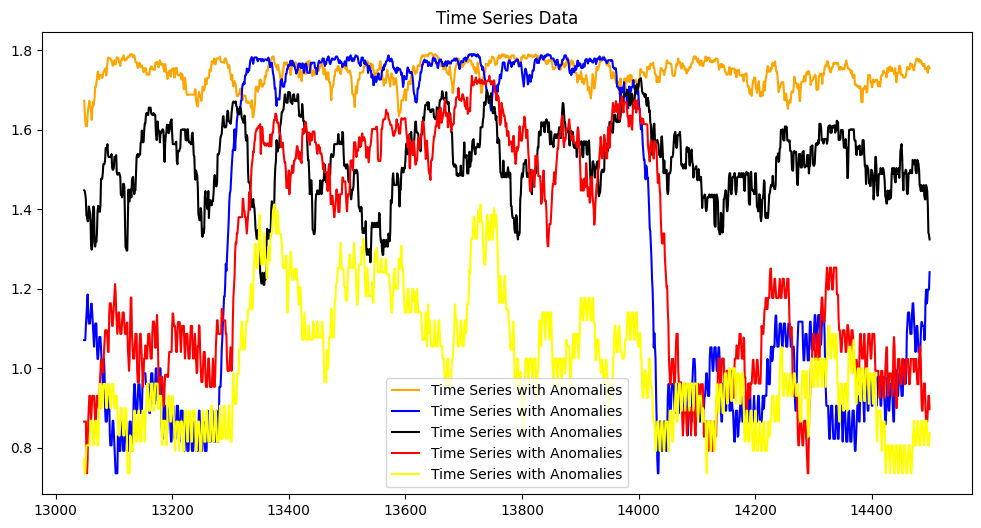

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ_grouped_data[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8642840401594200], color="black", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ_grouped_data[3557821101183501], color="yellow", label="Time Series with Anomalies")


plt.legend()
plt.title("Time Series Data")
plt.show()

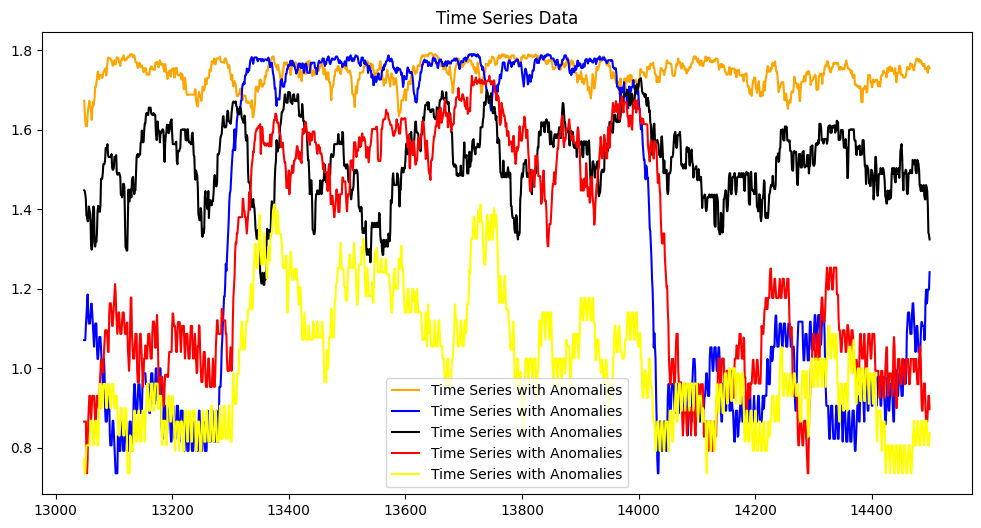

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ[8642840401612300], color="orange", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8642840401624200], color="blue", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8642840401594200], color="black", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[8677660403123800], color="red", label="Time Series with Anomalies")
plt.plot(df_ΕΝΤ[3557821101183501], color="yellow", label="Time Series with Anomalies")


plt.legend()
plt.title("Time Series Data")
plt.show()

<ipython-input-201-433eeb0065e3>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


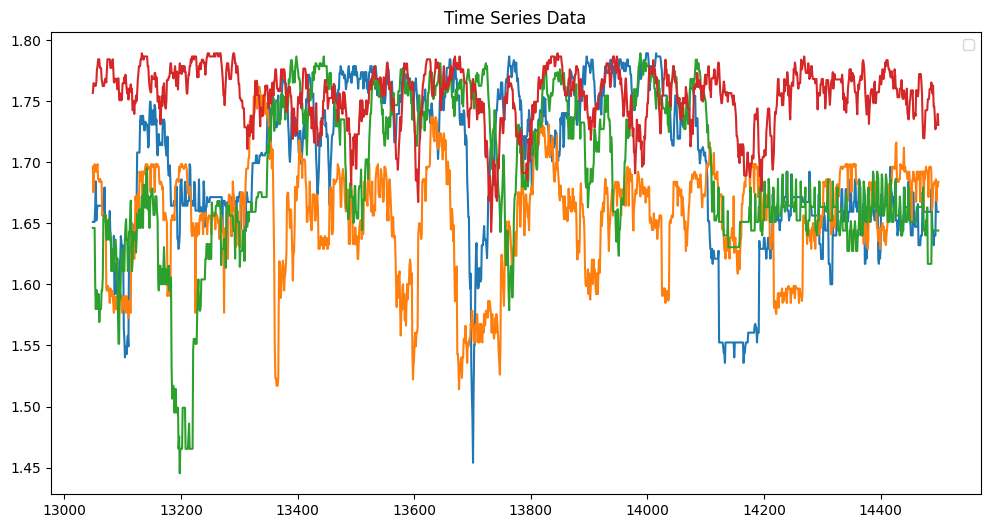

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(df_ΕΝΤ[8628490433231158])
plt.plot(df_ΕΝΤ[8609960480859058])
plt.plot(df_ΕΝΤ[8609960480666910])
plt.plot(df_ΕΝΤ[8609960468879057])

plt.legend()
plt.title("Time Series Data")
plt.show()

# New Section